# Бокс-плоты

In [15]:
from scipy.stats import norm, poisson, cauchy, uniform
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt

sizes = [20, 100,1000]
NORMAL, CAUCHY, POISSON, UNIFORM = "Нормальное распределение", "Распределение Коши", "Распределение Пуассона", "Равномерное распределение"
N = 1000

In [25]:
def moustache(distribution):
    q_1, q_3 = np.quantile(distribution, [0.25, 0.75])
    return q_1 - 3 / 2 * (q_3 - q_1), q_3 + 3 / 2 * (q_3 - q_1)

def count_out(distribution):
    x1, x2 = moustache(distribution)
    filtered = [x for x in distribution if x > x2 or x < x1]
    return len(filtered)

def DrawBoxplot(tips, name):
    sns.set_theme(style="whitegrid", palette="pastel")
    sns.boxplot(data=tips, orient='h', width=0.15)
    sns.despine(offset=10)
    x = np.array([20, 100, 1000])
    plt.xlabel("x")
    plt.yticks(range(3), ['20', '100', '1000'])
    plt.ylabel("n")
    plt.title(name)
    plt.savefig(name)
    plt.show()
    return

def printAnswer(result):
    print("Доля выбросов 20: " + str(result[0]))
    print("Доля выбросов 100: " + str(result[1]))
    print("Доля выбросов 1000: "+ str(result[2]))


## Нормальное распределение

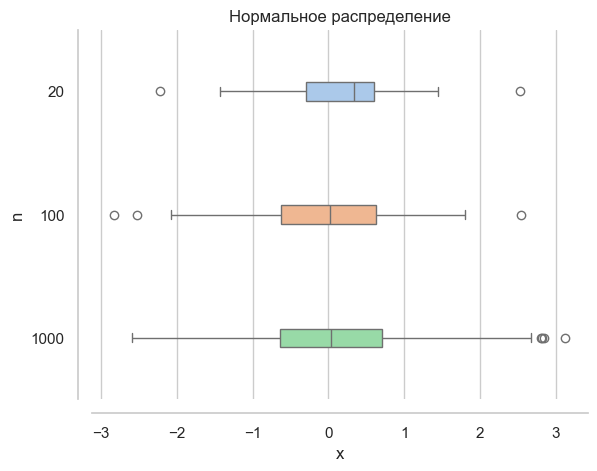

Доля выбросов 20: 0.0213
Доля выбросов 100: 0.01407
Доля выбросов 1000: 0.008514


In [27]:
tips, result, count = [], [], 0
for size in sizes:
    for i in range(N):
        distribution = norm.rvs(size=size)
        distribution.sort()
        count += count_out(distribution)
    result.append(count / (size * N))
    distribution = norm.rvs(size=size)
    distribution.sort()
    tips.append(distribution)
DrawBoxplot(tips, NORMAL)
printAnswer(result)

## Распределение Коши

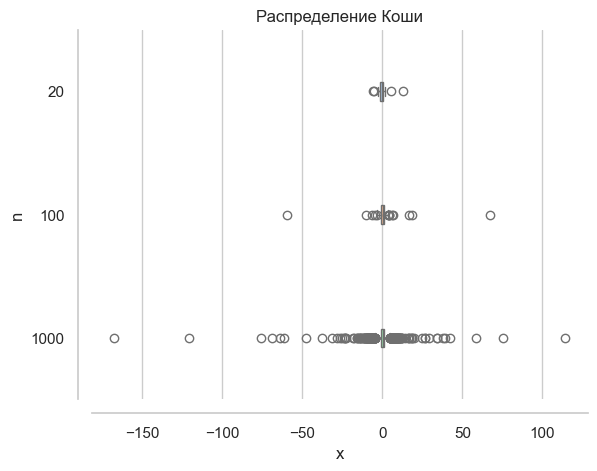

Доля выбросов 20: 0.14965
Доля выбросов 100: 0.18491
Доля выбросов 1000: 0.17454


In [31]:
tips, result, count = [], [], 0
for size in sizes:
    for i in range(N):
        distribution = cauchy.rvs(size=size)
        distribution.sort()
        count += count_out(distribution)
    result.append(count / (size * N))
    distribution = cauchy.rvs(size=size)
    distribution.sort()
    tips.append(distribution)
DrawBoxplot(tips, CAUCHY)
printAnswer(result)

## Распределение Пуассона

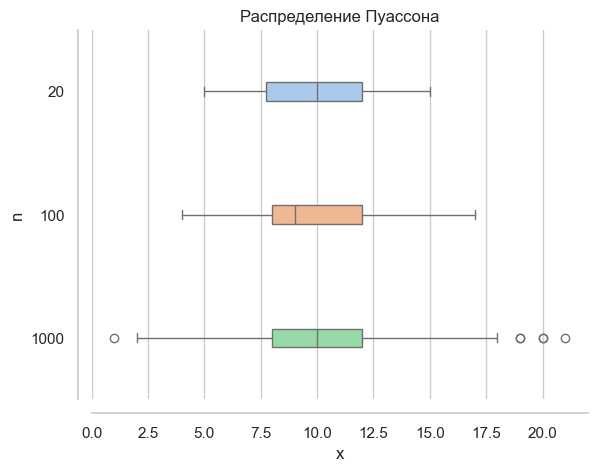

Доля выбросов 20: 0.0244
Доля выбросов 100: 0.01664
Доля выбросов 1000: 0.009405


In [33]:
tips, result, count = [], [], 0
for size in sizes:
    for i in range(N):
        distribution = poisson.rvs(10, size=size)
        distribution.sort()
        count += count_out(distribution)
    result.append(count / (size * N))
    distribution = poisson.rvs(10, size=size)
    distribution.sort()
    tips.append(distribution)
DrawBoxplot(tips, POISSON)
printAnswer(result)

## Равномерное распределение

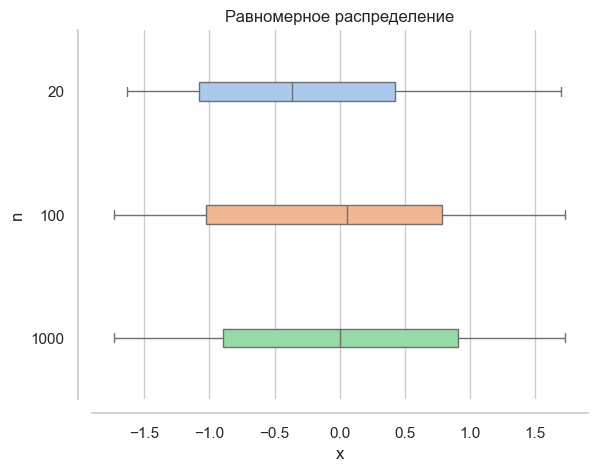

Доля выбросов 20: 0.00265
Доля выбросов 100: 0.00053
Доля выбросов 1000: 5.3e-05


In [36]:
tips, result, count = [], [], 0
for size in sizes:
    for i in range(N):
        distribution = uniform.rvs(size=size, loc=-m.sqrt(3), scale=2 * m.sqrt(3))
        distribution.sort()
        count += count_out(distribution)
    result.append(count / (size * N))
    distribution = uniform.rvs(size=size, loc=-m.sqrt(3), scale=2 * m.sqrt(3))
    distribution.sort()
    tips.append(distribution)
DrawBoxplot(tips, UNIFORM)
printAnswer(result)
